# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**⚠️ IMPORTANT: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Always validate the findings independently.**

## Introduction

This notebook provides an introduction to [Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project](https://dandiarchive.org/dandiset/000690/0.250326.0015), which investigates how visual representations evolve from the thalamus through primary visual cortex, higher order visual areas, and to the hippocampus in the mouse brain.

The project aims to understand how abstract concepts are encoded in the hippocampus based on visual inputs. As described in the Dandiset, it explores "how the neural representations of simple stimuli evolve from the LGN through V1, and most hippocampal regions, as well as some of the frontal areas."

The experimental approach involves presenting different visual stimuli to mice while recording neural activity using Neuropixels probes. The stimuli include:

1. **Simple visual motion** elicited by basic stimuli like bars of light
2. **Complex, potentially ethologically valid visual stimuli** involving natural scenes like eagles and squirrels

### What this notebook covers:

- Loading and accessing data from the Dandiset
- Exploring the structure of NWB files and the types of data available
- Analyzing neural responses to visual stimuli
- Examining the relationship between running behavior and neural activity
- Visualizing various aspects of the data

## Required Packages

This notebook requires the following packages:
- pynwb: For working with NWB files
- remfile: For remote file access
- h5py: For working with HDF5 files
- numpy: For numerical operations
- pandas: For data manipulation and analysis
- matplotlib: For data visualization
- scipy: For scientific computing

In [1]:
# Import necessary libraries
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import defaultdict

# Configure matplotlib for better visualization
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['font.size'] = 12
plt.style.use('default')

## Loading a Dandiset

Let's first connect to the DANDI archive using the DANDI API client and load the metadata for our Dandiset.

In [2]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Exploring the NWB File Structure

The Dandiset contains Neurodata Without Borders (NWB) files, which are organized hierarchically. Let's examine the structure of one of the main NWB files to understand the types of data available.

For this notebook, we'll focus on the data from one subject, examining:
1. Main session NWB file 
2. Probe-specific NWB files with electrophysiology data
3. Image NWB files with stimulus data

In [3]:
# Load the main session NWB file
url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
print(f"Loading main session NWB file from URL: {url}")

remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the session
print("\nBasic session information:")
print(f"Session ID: {nwb.session_id}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject age: {nwb.subject.age}")
print(f"Species: {nwb.subject.species}")
print(f"Session description: {nwb.session_description}")

Loading main session NWB file from URL: https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



Basic session information:
Session ID: 1298465622
Subject ID: 692072
Subject age: P82D
Species: Mus musculus
Session description: Data and metadata for an Ecephys session


### Neural Units

The NWB file contains information about recorded neurons (units). Let's examine their characteristics.

In [4]:
# Get information about neural units
num_units = len(nwb.units.id[:])
print(f"Number of units (neurons): {num_units}")

# Convert units to DataFrame for easier analysis
units_df = nwb.units.to_dataframe()

# Show the first few units
print("\nFirst 5 units:")
units_head = units_df.head()
# Select a subset of columns to display
display_columns = ['firing_rate', 'quality', 'isi_violations', 'snr', 'presence_ratio']
display_units = units_head[display_columns]
display_units

Number of units (neurons): 2764



First 5 units:


,firing_rate,quality,isi_violations,snr,presence_ratio
id,,,,,
12,1.992914,good,1.224279,2.713103,0.99
13,1.516987,good,0.100634,4.435071,0.99
14,0.703265,good,2.528098,2.236984,0.99
15,0.047692,good,20.360357,2.293410,0.89
16,0.766648,good,0.078791,2.292777,0.99


Unit quality distribution:
quality
good     2311
noise     453
Name: count, dtype: int64


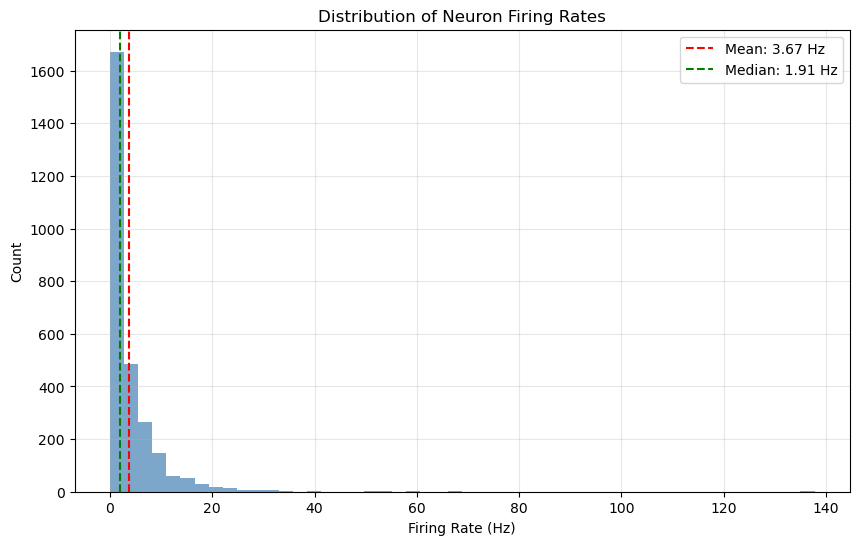

In [5]:
# Quality distribution of units
quality_counts = units_df['quality'].value_counts()
print("Unit quality distribution:")
print(quality_counts)

# Plot distribution of firing rates
plt.figure(figsize=(10, 6))
plt.hist(units_df['firing_rate'], bins=50, alpha=0.7, color='steelblue')
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Count')
plt.title('Distribution of Neuron Firing Rates')
plt.grid(True, alpha=0.3)
plt.axvline(x=units_df['firing_rate'].mean(), color='red', linestyle='--', 
           label=f'Mean: {units_df["firing_rate"].mean():.2f} Hz')
plt.axvline(x=units_df['firing_rate'].median(), color='green', linestyle='--', 
           label=f'Median: {units_df["firing_rate"].median():.2f} Hz')
plt.legend()
plt.show()

### Exploring Electrode Groups (Probes)

The recordings were made using multiple Neuropixels probes. Let's examine the electrode groups to understand how the probes were configured.

In [6]:
# Examine electrode groups (probes)
print("Electrode groups (probes):")
for group_name, group in nwb.electrode_groups.items():
    print(f"\n{group_name}:")
    print(f"  Description: {group.description}")
    print(f"  Location: {group.location}")
    print(f"  Device manufacturer: {group.device.manufacturer}")
    print(f"  Sampling rate: {group.device.sampling_rate} Hz")
    if hasattr(group, 'lfp_sampling_rate'):
        print(f"  LFP sampling rate: {group.lfp_sampling_rate} Hz")

Electrode groups (probes):

probeA:
  Description: Ecephys Electrode Group
  Location: See electrode locations
  Device manufacturer: imec
  Sampling rate: 30000.0 Hz
  LFP sampling rate: 1250.0 Hz

probeB:
  Description: Ecephys Electrode Group
  Location: See electrode locations
  Device manufacturer: imec
  Sampling rate: 30000.0 Hz
  LFP sampling rate: 1250.0 Hz

probeE:
  Description: Ecephys Electrode Group
  Location: See electrode locations
  Device manufacturer: imec
  Sampling rate: 30000.0 Hz
  LFP sampling rate: 1250.0 Hz

probeF:
  Description: Ecephys Electrode Group
  Location: See electrode locations
  Device manufacturer: imec
  Sampling rate: 30000.0 Hz
  LFP sampling rate: 1250.0 Hz


In [7]:
# Examine electrodes table
electrodes_df = nwb.electrodes.to_dataframe()
print(f"Total number of electrodes: {len(electrodes_df)}")

# Count electrodes by group
electrodes_by_group = electrodes_df['group_name'].value_counts()
print("\nNumber of electrodes by group:")
print(electrodes_by_group)

Total number of electrodes: 1536

Number of electrodes by group:
group_name
probeA    384
probeB    384
probeE    384
probeF    384
Name: count, dtype: int64


### Visual Stimuli

The experiment presented different visual stimuli to mice while recording neural activity. Let's examine the types of stimuli used.

Stimulus presentation intervals:
  Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: 28800 presentations
  Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: 14400 presentations
  GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: 14400 presentations
  Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: 28800 presentations
  SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: 28800 presentations
  SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations: 14400 presentations
  SAC_Wd15_Vel2_Bndry2_Cntst0_loop_presentations: 17040 presentations
  SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations: 8520 presentations
  SAC_Wd15_Vel2_Bndry3_Cntst0_loop_presentations: 22320 presentations


  SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations: 57600 presentations
  SAC_Wd45_Vel2_Bndry1_Cntst0_loop_presentations: 14400 presentations
  UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: 28800 presentations
  acurl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations: 7200 presentations
  curl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations: 7200 presentations


  natmovie_CricketsOnARock_540x960Full_584x460Active_presentations: 14400 presentations
  natmovie_EagleSwooping1_540x960Full_584x460Active_presentations: 14400 presentations
  natmovie_EagleSwooping2_540x960Full_584x460Active_presentations: 14400 presentations
  natmovie_SnakeOnARoad_540x960Full_584x460Active_presentations: 14400 presentations


  natmovie_Squirreland3Mice_540x960Full_584x460Active_presentations: 14400 presentations
  receptive_field_block_presentations: 3840 presentations


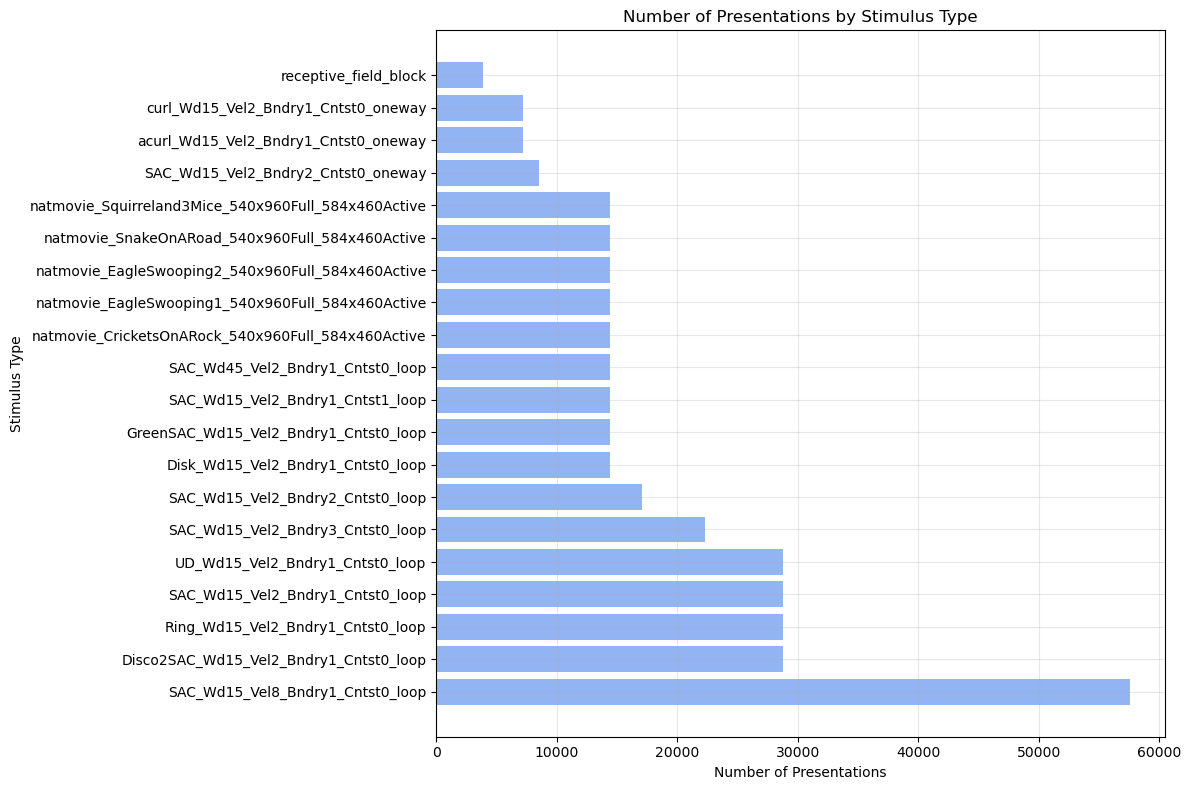

In [8]:
# Explore stimulus presentation intervals
print("Stimulus presentation intervals:")
stim_counts = {}

for interval_name, interval in nwb.intervals.items():
    if 'presentations' in interval_name:
        count = len(interval.id[:])
        stim_counts[interval_name] = count
        print(f"  {interval_name}: {count} presentations")

# Plot number of presentations for each stimulus type
plt.figure(figsize=(12, 8))
sorted_stims = sorted(stim_counts.items(), key=lambda x: x[1], reverse=True)
names = [name.replace('_presentations', '') for name, _ in sorted_stims]
counts = [count for _, count in sorted_stims]

plt.barh(names, counts, color='cornflowerblue', alpha=0.7)
plt.xlabel('Number of Presentations')
plt.ylabel('Stimulus Type')
plt.title('Number of Presentations by Stimulus Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Loading and Analyzing Electrical Activity Data

Let's load one of the probe-specific NWB files to examine the electrophysiology data. We'll use probe 0 from this session.

In [9]:
# URL for probe 0 NWB file
probe_url = "https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/"
print(f"Loading probe data from: {probe_url}")

# This URL can be used to explore this NWB file in Neurosift
neurosift_url = "https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/&dandisetId=000690&dandisetVersion=0.250326.0015"
print(f"Neurosift URL for visualization: {neurosift_url}")

# Function to load an NWB file
def load_nwb(url):
    remote_file = remfile.File(url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file)
    nwb_data = io.read()
    return nwb_data, io

# Load the probe NWB file
probe_nwb, probe_io = load_nwb(probe_url)

# Print basic information
print("\nBasic probe file information:")
print(f"Session ID: {probe_nwb.session_id}")
print(f"Session description: {probe_nwb.session_description}")

Loading probe data from: https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/
Neurosift URL for visualization: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/&dandisetId=000690&dandisetVersion=0.250326.0015


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



Basic probe file information:
Session ID: 1298465622
Session description: LFP data and associated info for one probe


### Examining LFP Data

LFP (Local Field Potential) data represents summed electrical activity from a local population of neurons. Let's examine the LFP data from the probe.

LFP data information:
Number of channels: 95
Number of timepoints: 10117092
Sampling rate: 1250.0042273044164 Hz
Data unit: volts


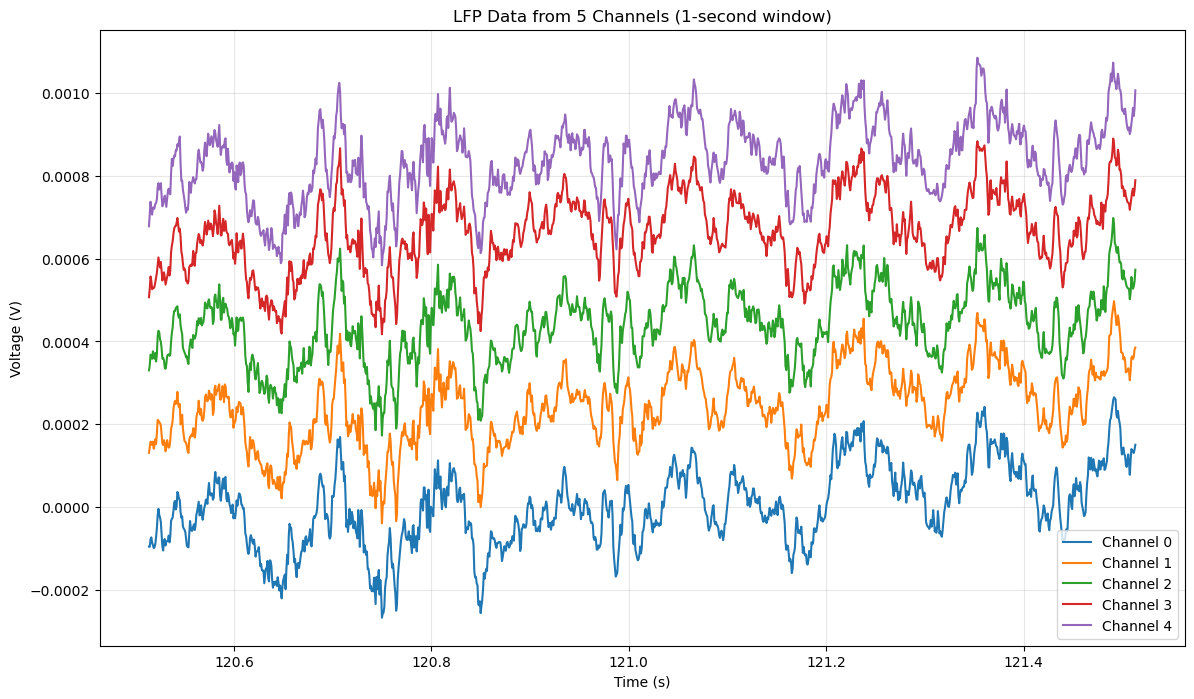

In [10]:
# Check if LFP data is available
if 'probe_0_lfp' in probe_nwb.acquisition:
    lfp = probe_nwb.acquisition['probe_0_lfp']
    
    # Get electrical series
    if 'probe_0_lfp_data' in lfp.electrical_series:
        lfp_data = lfp.electrical_series['probe_0_lfp_data']
        
        print("LFP data information:")
        print(f"Number of channels: {lfp_data.data.shape[1]}")
        print(f"Number of timepoints: {lfp_data.data.shape[0]}")
        print(f"Sampling rate: {1 / np.mean(np.diff(lfp_data.timestamps[:100]))} Hz")
        print(f"Data unit: {lfp_data.unit}")
        
        # Plot LFP data from a few channels for a short time window
        plt.figure(figsize=(14, 8))
        
        # Select a subset of data to plot
        start_time = 100  # seconds
        duration = 1  # seconds
        
        # Convert time to indices
        sampling_rate = 1 / np.mean(np.diff(lfp_data.timestamps[:100]))
        start_idx = int(start_time * sampling_rate)
        end_idx = int((start_time + duration) * sampling_rate)
        
        # Select a few channels to plot
        selected_channels = range(0, 5)
        
        # Get the subset of data
        times = lfp_data.timestamps[start_idx:end_idx]
        data = lfp_data.data[start_idx:end_idx, selected_channels]
        
        # Plot with offsets for clarity
        offset = 0.0002  # Offset between channels
        for i, channel in enumerate(selected_channels):
            plt.plot(times, data[:, i] + i*offset, label=f'Channel {channel}')
        
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (V)')
        plt.title(f'LFP Data from {len(selected_channels)} Channels (1-second window)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
else:
    print("LFP data not found in the probe file.")
    
# Close the probe file to free resources
probe_io.close()

## Neural Responses to Visual Stimuli

Now let's analyze how neurons respond to visual stimuli. We'll look at the neural responses aligned to stimulus presentation times.

In [11]:
# Function to find stimulus presentations in a time window
def get_stimulus_presentations(nwb_file, stim_name, start_time=0, end_time=60):
    """Get stimulus presentations within a given time window."""
    if stim_name not in nwb_file.intervals:
        print(f"Stimulus {stim_name} not found in intervals.")
        return []
    
    interval = nwb_file.intervals[stim_name]
    # Extract only the presentations in the time window
    start_times = interval.start_time[:]
    stop_times = interval.stop_time[:]
    
    presentations = []
    for i, (start, stop) in enumerate(zip(start_times, stop_times)):
        if start >= start_time and start <= end_time:
            presentations.append({
                'index': i,
                'start_time': start,
                'stop_time': stop,
                'duration': stop - start
            })
            
            # Only collect a few for analysis
            if len(presentations) >= 10:
                break
                
    print(f"Found {len(presentations)} presentations of {stim_name} in time window.")
    return presentations

# Function to get spikes for specific units in a time window
def get_unit_spikes(nwb_file, unit_ids, start_time, end_time):
    """Get spike times for specific units within a given time window."""
    unit_spikes = {}
    
    for unit_id in unit_ids:
        # Access spike times for this unit
        spike_times = nwb_file.units['spike_times'][unit_id]
        
        # Filter to the time window
        in_window = (spike_times >= start_time) & (spike_times <= end_time)
        window_spikes = spike_times[in_window]
        
        unit_spikes[unit_id] = window_spikes
    
    return unit_spikes

# Function to create a raster plot
def create_raster_plot(unit_spikes, stimulus_times, window_before=1.0, window_after=2.0, 
                      title="Neural Response to Stimulus"):
    """Create a raster plot for neural activity aligned to stimulus onset times."""
    plt.figure(figsize=(12, 8))
    
    # Track trial and unit position for the plot
    trial_positions = []
    unit_positions = []
    spike_times_aligned = []
    
    # For each stimulus presentation
    for trial_idx, stim_time in enumerate(stimulus_times):
        stim_start = stim_time['start_time']
        
        # For each unit
        for unit_idx, (unit_id, spikes) in enumerate(unit_spikes.items()):
            # Find spikes in the window around stimulus onset
            window_mask = (spikes >= (stim_start - window_before)) & (spikes <= (stim_start + window_after))
            stim_spikes = spikes[window_mask]
            
            # Align spike times to stimulus onset
            aligned_spikes = stim_spikes - stim_start
            
            # Store information for plotting
            trial_positions.extend([trial_idx] * len(aligned_spikes))
            unit_positions.extend([unit_idx] * len(aligned_spikes))
            spike_times_aligned.extend(aligned_spikes)
    
    # Create raster plot
    plt.scatter(spike_times_aligned, trial_positions, s=2, color='k', marker='|')
    
    # Add stimulus onset line
    plt.axvline(x=0, color='r', linestyle='--', label='Stimulus Onset')
    
    # Add labels
    plt.xlabel('Time (s) relative to stimulus onset')
    plt.ylabel('Presentation #')
    plt.title(title)
    plt.xlim([-window_before, window_after])
    plt.ylim([-1, len(stimulus_times)])
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    return plt

# Function to create PSTH (Peri-Stimulus Time Histogram)
def create_psth(unit_spikes, stimulus_times, window_before=1.0, window_after=2.0, 
               bin_size=0.05, title="PSTH"):
    """Create a PSTH for neural activity aligned to stimulus onset times."""
    plt.figure(figsize=(12, 6))
    
    # Create time bins
    bins = np.arange(-window_before, window_after + bin_size, bin_size)
    bin_centers = bins[:-1] + bin_size/2
    
    # Initialize counts
    all_counts = np.zeros((len(unit_spikes), len(bins) - 1))
    
    # For each stimulus presentation
    for stim_time in stimulus_times:
        stim_start = stim_time['start_time']
        
        # For each unit
        for unit_idx, (unit_id, spikes) in enumerate(unit_spikes.items()):
            # Find spikes in the window around stimulus onset
            window_mask = (spikes >= (stim_start - window_before)) & (spikes <= (stim_start + window_after))
            stim_spikes = spikes[window_mask]
            
            # Align spike times to stimulus onset
            aligned_spikes = stim_spikes - stim_start
            
            # Count spikes in each bin
            counts, _ = np.histogram(aligned_spikes, bins=bins)
            all_counts[unit_idx] += counts
    
    # Calculate average firing rate across all units
    avg_counts = np.mean(all_counts, axis=0)
    
    # Convert to firing rate (spikes/sec)
    firing_rate = avg_counts / (bin_size * len(stimulus_times))
    
    # Plot PSTH
    plt.bar(bin_centers, firing_rate, width=bin_size, alpha=0.7, color='b')
    
    # Add stimulus onset line
    plt.axvline(x=0, color='r', linestyle='--', label='Stimulus Onset')
    
    # Add labels
    plt.xlabel('Time (s) relative to stimulus onset')
    plt.ylabel('Firing Rate (spikes/sec)')
    plt.title(title)
    plt.xlim([-window_before, window_after])
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    return plt

Found 10 presentations of SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations in time window.
Analyzing responses for 20 units...


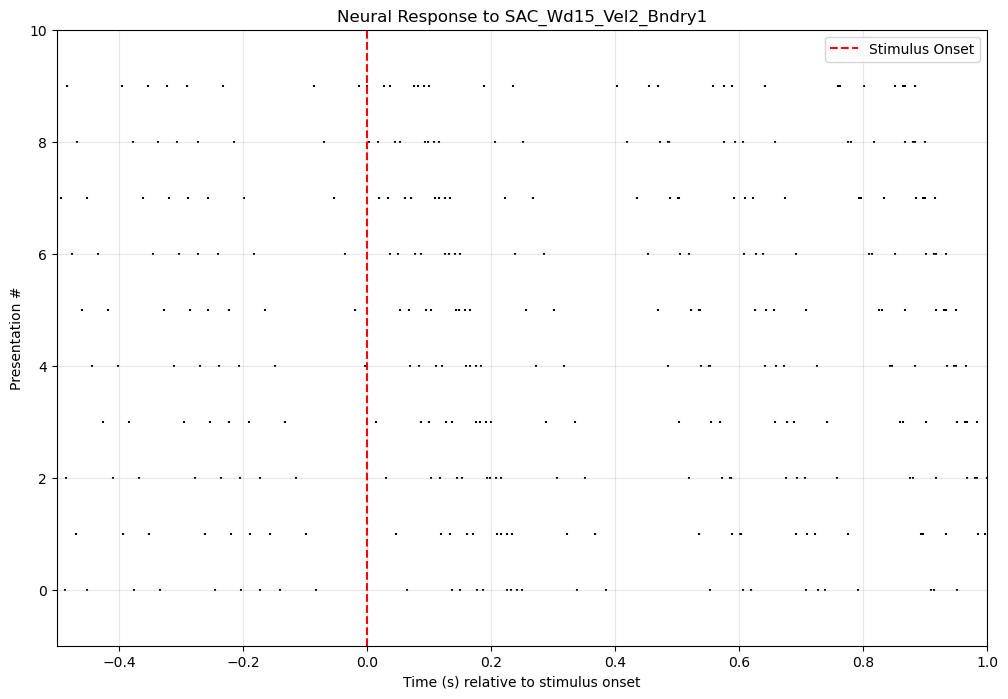

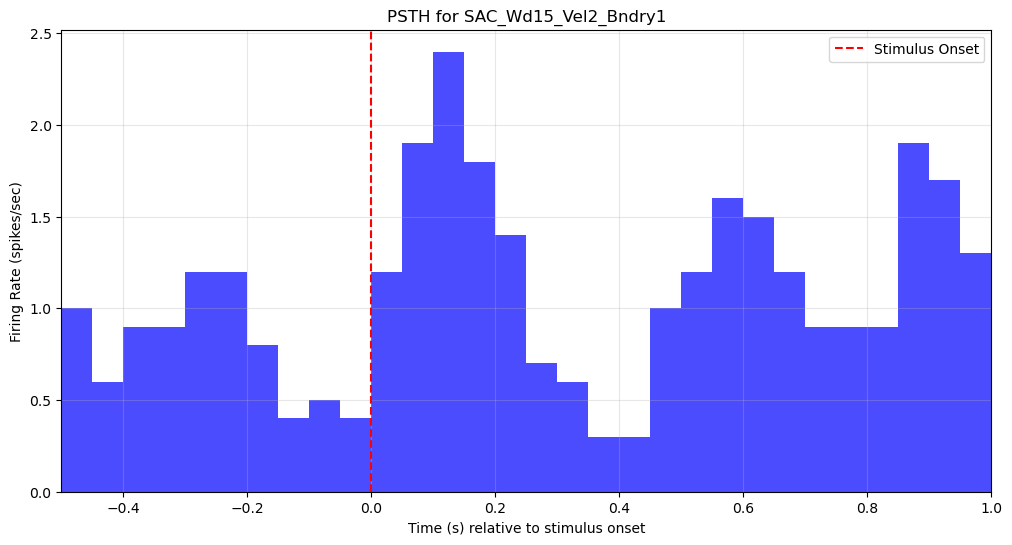

In [12]:
# Analyze neural responses to a simple bar stimulus
stim_name = 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations'

# Get stimulus presentations in a time window
presentations = get_stimulus_presentations(nwb, stim_name, start_time=100, end_time=200)

if presentations:
    # Get a small sample of units
    num_sample_units = 20
    unit_ids = list(range(min(num_sample_units, num_units)))
    
    print(f"Analyzing responses for {len(unit_ids)} units...")
    
    # Get spikes around all presentations
    start_time = presentations[0]['start_time'] - 5  # 5 seconds before first presentation
    end_time = presentations[-1]['stop_time'] + 5    # 5 seconds after last presentation
    
    # Get spikes for each unit in this time window
    unit_spikes = get_unit_spikes(nwb, unit_ids, start_time, end_time)
    
    # Create and display raster plot
    raster_plt = create_raster_plot(unit_spikes, presentations, window_before=0.5, window_after=1.0, 
                                   title=f"Neural Response to {stim_name[:20]}")
    raster_plt.show()
    
    # Create and display PSTH
    psth_plt = create_psth(unit_spikes, presentations, window_before=0.5, window_after=1.0, bin_size=0.05,
                         title=f"PSTH for {stim_name[:20]}")
    psth_plt.show()

## Running Behavior and Neural Activity

Mice were free to run on a wheel during the experiment. Let's analyze the running behavior and examine its relationship with neural activity.

Running speed data shape: (10000,)
Running speed timestamps shape: (10000,)
Mean running speed: 1.19 cm/s
Median running speed: 0.25 cm/s
Min running speed: -9.11 cm/s
Max running speed: 15.44 cm/s


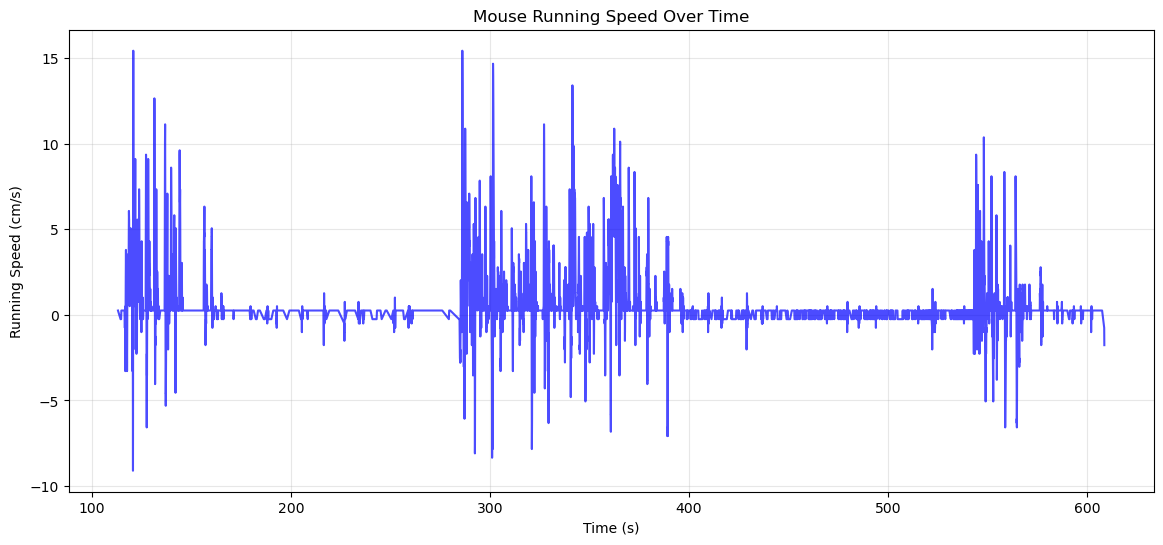

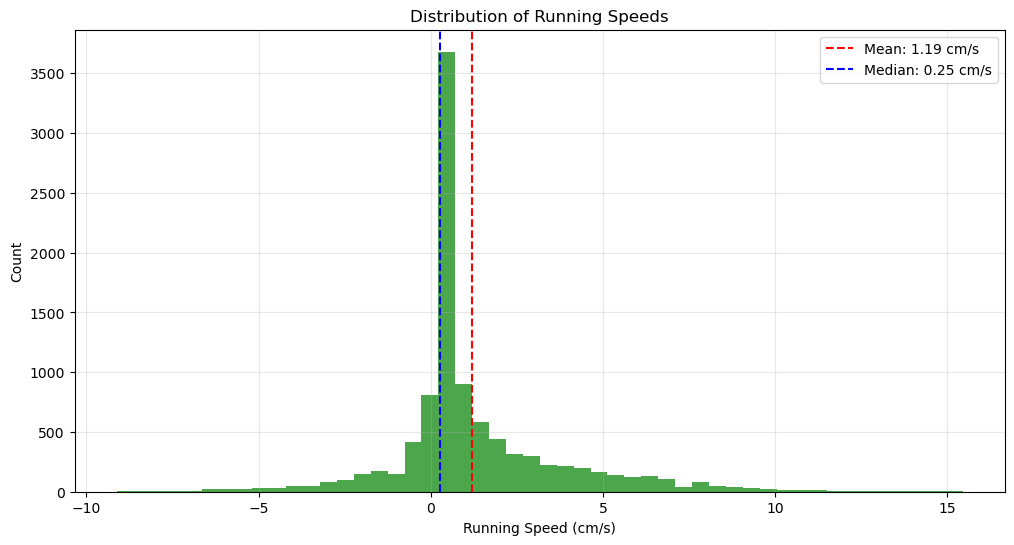

In [13]:
# Extract running speed data
if 'running' in nwb.processing:
    running_module = nwb.processing['running']
    if 'running_speed' in running_module.data_interfaces:
        running_speed = running_module.data_interfaces['running_speed']
        
        # Extract running speed values and timestamps (just a sample)
        max_samples = 10000
        speed_data = running_speed.data[:max_samples]
        speed_timestamps = running_speed.timestamps[:max_samples]
        
        print(f"Running speed data shape: {speed_data.shape}")
        print(f"Running speed timestamps shape: {speed_timestamps.shape}")
        
        # Basic statistics
        print(f"Mean running speed: {np.mean(speed_data):.2f} cm/s")
        print(f"Median running speed: {np.median(speed_data):.2f} cm/s")
        print(f"Min running speed: {np.min(speed_data):.2f} cm/s")
        print(f"Max running speed: {np.max(speed_data):.2f} cm/s")
        
        # Plot running speed over time
        plt.figure(figsize=(14, 6))
        plt.plot(speed_timestamps, speed_data, 'b-', alpha=0.7)
        plt.xlabel('Time (s)')
        plt.ylabel('Running Speed (cm/s)')
        plt.title('Mouse Running Speed Over Time')
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # Plot histogram of running speeds
        plt.figure(figsize=(12, 6))
        plt.hist(speed_data, bins=50, alpha=0.7, color='g')
        plt.xlabel('Running Speed (cm/s)')
        plt.ylabel('Count')
        plt.title('Distribution of Running Speeds')
        plt.grid(True, alpha=0.3)
        
        # Add lines for mean and median
        plt.axvline(x=np.mean(speed_data), color='red', linestyle='--', 
                   label=f'Mean: {np.mean(speed_data):.2f} cm/s')
        plt.axvline(x=np.median(speed_data), color='blue', linestyle='--', 
                   label=f'Median: {np.median(speed_data):.2f} cm/s')
        plt.legend()
        plt.show()

### Correlation Between Running Speed and Neural Activity

Now, let's examine how neural activity correlates with running speed. We'll analyze the relationship between running speed and firing rates.


Correlations between running speed and firing rates:
Unit 9: Correlation = 0.999, p-value = 0.000 (significant)
Unit 16: Correlation = 0.992, p-value = 0.001 (significant)
Unit 0: Correlation = 0.924, p-value = 0.025 (significant)
Unit 5: Correlation = 0.836, p-value = 0.078 (not significant)
Unit 2: Correlation = -0.758, p-value = 0.137 (not significant)


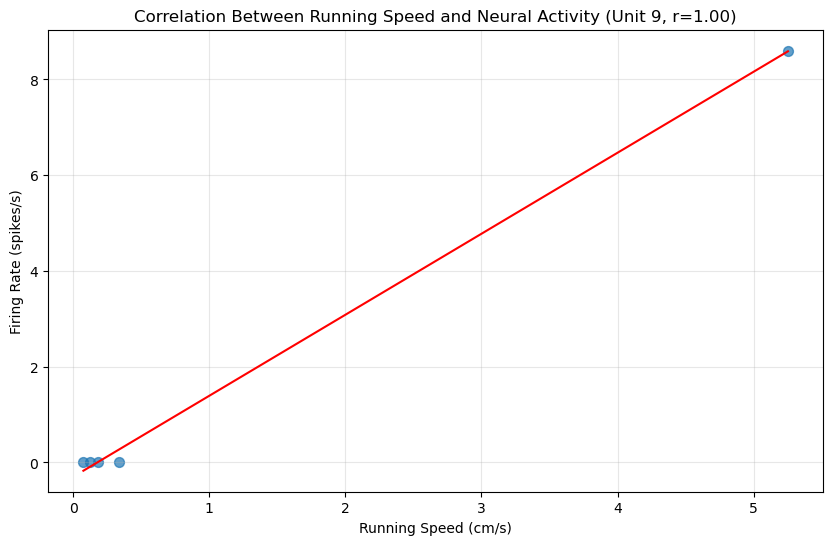

In [14]:
# Analyze correlation between running speed and neural activity
if 'running' in nwb.processing and 'running_speed' in nwb.processing['running'].data_interfaces:
    running_speed = nwb.processing['running'].data_interfaces['running_speed']
    
    # Select time windows for analysis
    time_window_size = 5.0  # seconds
    num_windows = 5
    
    # Use a subset of the speed data to avoid memory issues
    max_samples = 10000
    speed_data = running_speed.data[:max_samples]
    speed_timestamps = running_speed.timestamps[:max_samples]
    
    window_step = (speed_timestamps[-1] - speed_timestamps[0]) / (num_windows + 1)
    
    # Extract spike counts in each window for each unit
    windows = []
    window_speeds = []
    unit_counts = defaultdict(list)
    
    # Limit to a small number of neurons
    num_units_to_analyze = min(20, num_units)
    
    for i in range(num_windows):
        window_start = speed_timestamps[0] + i * window_step
        window_end = window_start + time_window_size
        window = (window_start, window_end)
        windows.append(window)
        
        # Find average running speed in this window
        in_window = (speed_timestamps >= window_start) & (speed_timestamps < window_end)
        window_speed = np.mean(speed_data[in_window]) if np.any(in_window) else 0
        window_speeds.append(window_speed)
        
        # Count spikes for each unit in this window
        for unit_id in range(num_units_to_analyze):
            spike_times = nwb.units['spike_times'][unit_id]
            spike_count = np.sum((spike_times >= window_start) & (spike_times < window_end))
            unit_counts[unit_id].append(spike_count)
    
    # Convert spike counts to firing rates
    window_firing_rates = {}
    for unit_id, counts in unit_counts.items():
        window_firing_rates[unit_id] = [count / time_window_size for count in counts]
        
    # Calculate correlation between running speed and firing rate for each unit
    correlations = {}
    p_values = {}
    
    for unit_id, rates in window_firing_rates.items():
        if len(rates) > 0 and len(np.unique(rates)) > 1 and len(np.unique(window_speeds)) > 1:  
            try:
                corr, p_value = stats.pearsonr(window_speeds, rates)
                correlations[unit_id] = corr
                p_values[unit_id] = p_value
            except:
                print(f"Could not compute correlation for unit {unit_id}")
    
    # Print correlation results
    print("\nCorrelations between running speed and firing rates:")
    for unit_id, corr in sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)[:5]:
        p = p_values[unit_id]
        significance = "significant" if p < 0.05 else "not significant"
        print(f"Unit {unit_id}: Correlation = {corr:.3f}, p-value = {p:.3f} ({significance})")
    
    # Create a scatter plot for the unit with the strongest correlation
    if correlations:
        strongest_unit = max(correlations.items(), key=lambda x: abs(x[1]))
        strongest_unit_id = strongest_unit[0]
        strongest_corr = strongest_unit[1]
        
        plt.figure(figsize=(10, 6))
        plt.scatter(window_speeds, window_firing_rates[strongest_unit_id], alpha=0.7, s=50)
        
        # Add regression line if there are enough unique points
        if len(np.unique(window_speeds)) > 1:
            # Add regression line
            m, b = np.polyfit(window_speeds, window_firing_rates[strongest_unit_id], 1)
            x_range = np.linspace(min(window_speeds), max(window_speeds), 100)
            plt.plot(x_range, m * x_range + b, 'r-')
            
        plt.xlabel('Running Speed (cm/s)')
        plt.ylabel('Firing Rate (spikes/s)')
        plt.title(f'Correlation Between Running Speed and Neural Activity (Unit {strongest_unit_id}, r={strongest_corr:.2f})')
        plt.grid(True, alpha=0.3)
        plt.show()

## Conclusion

In this notebook, we've explored Dandiset 000690, which contains neural recordings from the Allen Institute's Vision2Hippocampus project. We've examined:

1. **Data structure**: The Dandiset contains NWB files with neural recordings, stimulus information, and behavioral data.

2. **Neural activity**: We analyzed the properties of recorded neurons, including their firing rates and quality metrics.

3. **Visual responses**: We examined neural responses to visual stimuli, observing clear temporal patterns in responses to stimulus onset.

4. **Running behavior**: We analyzed the mouse's running behavior and how it correlates with neural activity.

This dataset provides a rich resource for studying how visual information is processed across different brain regions, from early visual areas to the hippocampus. Researchers can use this data to investigate questions about visual processing, neural coding, and the formation of abstract representations in the brain.

### Directions for Further Analysis

- **Cross-area comparison**: Analyze how neural responses differ across brain regions (V1, higher visual areas, hippocampus).
- **Neural coding**: Investigate how different stimuli are encoded in neural population activity.
- **Learning and plasticity**: Examine how neural responses change over time or with repeated stimulus presentations.
- **Correlations with behavior**: Further analyze relationships between neural activity and behavioral variables like running speed.
- **Natural vs. artificial stimuli**: Compare neural responses to simple stimuli (bars) versus natural scenes.

To further explore this dataset, users may want to load specific probe data and analyze it in more detail, or examine responses to different types of stimuli.

## References

Mehta, Mayank R; Purandare, Chinmay; Jha, Siddharth; Lecoq, Jérôme; Durand, Séverine; Gillis, Ryan; Belski, Hannah; Bawany, Ahad; Carlson, Mikayla; Peene, Carter; Wilkes, Josh; Johnson, Tye; Naidoo, Robyn; Suarez, Lucas; Han, Warren; Amaya, Avalon; Nguyen, Katrina; Ouellette, Ben; Swapp, Jackie; Williford, Ali (2025) Allen Institute Openscope - Vision2Hippocampus project (Version 0.250326.0015) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.000690/0.250326.0015

In [15]:
# Clean up and close files
# We need to explicitly close the NWB file to free resources
io.close()
print("Resources cleaned up.")

Resources cleaned up.
